In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime


# Иванов Юрий

In [3]:
# задание 1 балл (сум 1)
# загрузить данные, индекс - переменная вида дата/время
df = pd.read_csv('C:/Users/Yana/Desktop/юни/прога/введение в АД/crime_csv.zip', 
                 parse_dates=True, index_col = ['Unnamed: 0'])
df.index

DatetimeIndex(['2010-07-01 00:10:00', '2010-07-01 00:11:00',
               '2010-07-01 00:35:00', '2010-07-01 00:44:00',
               '2010-07-01 01:10:00', '2010-07-01 01:38:00',
               '2010-07-01 01:45:00', '2010-07-01 05:50:00',
               '2010-07-01 06:38:00', '2010-07-01 06:43:00',
               ...
               '2015-12-31 22:40:00', '2015-12-31 22:40:00',
               '2015-12-31 22:46:00', '2015-12-31 22:50:00',
               '2015-12-31 22:56:00', '2015-12-31 23:09:00',
               '2015-12-31 23:40:00', '2015-12-31 23:44:00',
               '2015-12-31 23:55:00', '2015-12-31 23:55:00'],
              dtype='datetime64[ns]', length=273181, freq=None)

In [5]:
# задание 1 балл (сум 2)
# построить сводную таблицу по клоличеству 
# правонарушений (строки - пол (driver_gender), колонки - расса (driver_race))

df_pivot = pd.crosstab(index=df.driver_gender,columns=df.driver_race', aggfunc='count', values = 'id', normalize= 'columns')
df_pivot

#df.groupby(['driver_gender', 'driver_race']).count()[['id']]

ValueError: If using all scalar values, you must pass an index

In [ ]:
# задание 1 балл (сум 3)
# построить сводную таблицу по процентам в зависимости от рассы (1 - для каждой рассы)
# и пола внутри рассы (например, белые мужчины 0.8, белые женщины 0.2)
# в таблице строки - пол, колонrи - расса
df_per = df_pivot.apply(lambda x: x/sum(x))
df_per

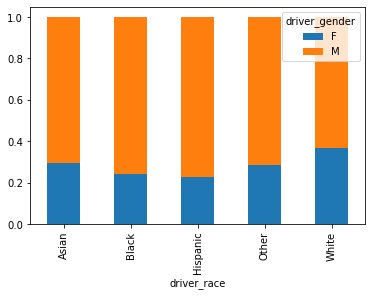

In [56]:
# задание 1 балл (сум 4)
# результат предидущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и 
# разделением внутри по полу (внимание! подписи на графике)
# seaborn так делать не умеет
# df_per = df_per/100
df_per.transpose().plot(kind='bar', stacked=True);

In [57]:
# задание 1 балла (сум 5)
# какое кодичество правонарушений  по видам нарушений (violation) 
# зафиксированны для мужчин и женщин (driver_gender)
# обязательно посчитать суммы по строкам/столбцам
# в таблице не должны быть np.nan (только числа)
# все оформить в виде одной сводной таблицы
df.pivot_table(index = 'driver_gender', columns = 'violation', aggfunc = 'count', values = 'id',fill_value=0, margins=True)
#df.pivot_table(index='driver_gender',columns='violation',aggfunc='count',fill_value=0,margins=True)['violation_raw']

violation,DUI,Equipment,Moving violation,Other,Other (non-mapped),All
driver_gender,,,,,,
F,198,18755,76717,3441,0,99111
M,513,31845,135383,6327,2,174070
All,711,50600,212100,9768,2,273181


Index(['Чт'], dtype='object')

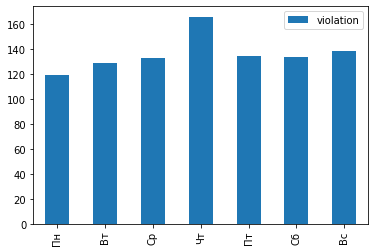

In [90]:
# задание 1 балл (сум 6)
# зависит ли количество правонарушений в среднем от дня недели (рабочий Пн-Пт или выходной Сб-Вс)
# визуализировать результат
# когда больше всего нарушений?
#df.resample([check])



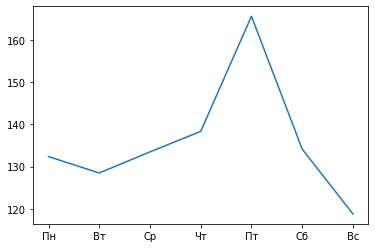

In [8]:
df_mean.plot();

## Неадекватный  водитель (Driving under the influence (DUI))
отсюда и ниже работам только с водителями под воздействием веществ (4 балла)

1. Отобрать водителей DUI
2. Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)
3. Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор).
4. Для выделенных частей проанализировать среднее количество правонарушений по часам суток, есль ли разница (если есть то в чем). 

Внимание! На каждой оси X должны стоять не абстрактные числа, а например часы или дни недели.

In [91]:
df_dui = df.query("violation == 'DUI'").copy()
df_dui

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,Asian,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,Hispanic,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-20 23:35:00,VT-2015-41728,VT,Putney,Windham County,50025.0,I 91 S MM21,BRATTLEBORO VSP,M,38.0,38.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,3.644600e+08
2015-11-22 00:02:00,VT-2015-41834,VT,Lyndonville,Caledonia County,50005.0,Lily Pond Rd,ST JOHNSBURY VSP,M,44.0,44.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,2.733421e+08
2015-11-30 20:16:00,VT-2015-43322,VT,Lyndon,Caledonia County,50005.0,I91 MM 137 NB,ST JOHNSBURY VSP,M,19.0,19.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-9.697686e+08
2015-12-30 18:22:00,VT-2015-45517,VT,Randolph,Orange County,50017.0,VT RT 66 & STOCK FARM RD,ROYALTON VSP,M,43.0,43.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-3.035562e+08


In [92]:
df_dui_c = df_dui.resample('D').count()
df_dui_c['day']=df_dui_c.index.dayofweek
df_dui_mean = df_dui_c.groupby('day')['violation'].mean()
df_dui_mean.index = ['Пн','Вт','Ср','Чт','Пт','Сб','Вс']
df_dui_mean

Пн    0.229965
Вт    0.202091
Ср    0.254355
Чт    0.226481
Пт    0.489510
Сб    0.632867
Вс    0.445993
Name: violation, dtype: float64

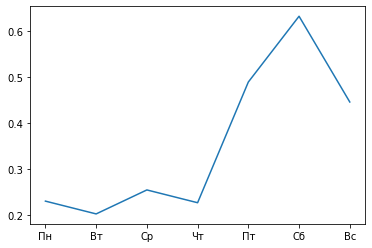

In [11]:
df_dui_mean.plot();

# Разделим выборку на 2 части: будние(пн-чт) и выходные (пт-вс)
В выходные запишем так же пятницу, так как это последний рабочий день и люди ведут себя более "отвязно" вечером

In [93]:
# df_workdays = df_dui.query("day < 5")
# df_workdays
df_dui['day'] = df_dui.index.dayofweek
df_work = df_dui.query("day < 4").copy()
df_chill = df_dui.query("day >= 4").copy()

<AxesSubplot:xlabel='time'>

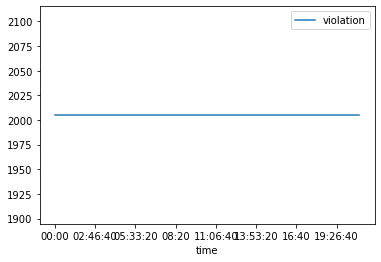

In [116]:
# df_work_hour = df_work.resample('h').count()
# df_work_hour_mean = df_work_hour.groupby('day')['violation'].mean()
# df_work_hour
df_work = df_work.resample('3H').count()
df_work['time'] = df_work.index.time
df_work.groupby('time')[['violation']].count().plot()

<AxesSubplot:xlabel='time'>

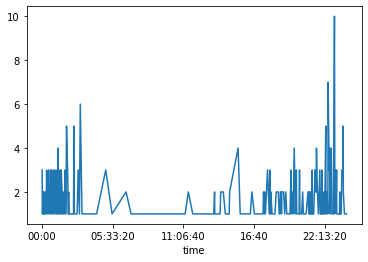

In [95]:
df_chill['time'] = df_chill.index.time
df_chill.groupby(['time'])['violation'].count().plot()

## Вывод: отличий нет.